In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_excel("titanic.xls")
df = titanic
titanic
#passengerID
# Survived - did the passenger survived
# Pclass - passenger class
# Name (Master is boy, too young to be called Mister)
# Sex
# Age
# Sibsp - number of siblings and/or spouse on board
# Parch - number of parents/children on board
# Fare - ticket fare
# Cabin - room number
# Embarked - the port the passenger embarked from

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### 1. How is age distributed in every pclass and in every age?

##### Age distribution in each pclass (passanger class)

<Axes: xlabel='pclass', ylabel='age'>

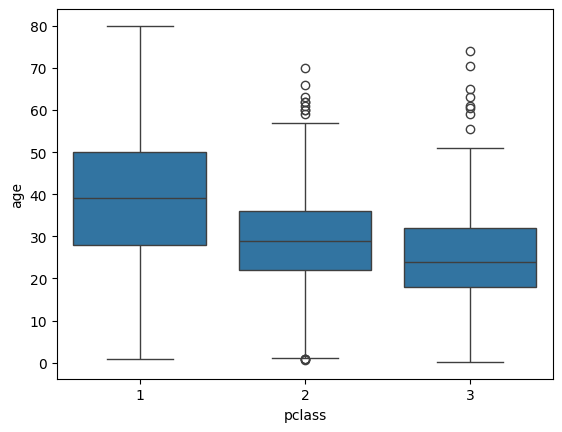

In [3]:
sns.boxplot(x="pclass",y="age",data=df)

### 2. Which family had lost the most members?

##### seperate names for easier access


In [20]:
family_names = df["name"].apply(lambda name: name.split(",")[0].strip())
prefixes = df["name"].apply(lambda name: (name.split(",")[1]).split(".")[0].strip())
first_names = df["name"].apply(lambda name: (name.split(",")[1]).split(".")[1].strip())
df["first_name"] = first_names
df["last_name"] = family_names
df["prefix"] = prefixes


In [36]:
# assuming families had the same tickets and family names
df["died"] = df["survived"].apply(lambda survived: 1-survived)
families_deaths = df[["ticket","last_name","died"]].groupby(["ticket","last_name"]).sum()
max_deaths = families_deaths.died.max()
max_deaths



11